# Session 2 (a): POD

## Intro and terminology

POD and PCA are two closely related, dual approaches to dimensionality reduction. Although both rely on the singular value decomposition (SVD), their notations differ, which can be confusing at first. The conventions used in this course are summarised below:

* D or X := dataset
* L := matrix of eigenvalues
* L* or $\Sigma$ := matrix of singular values
* K = $X^T X$ := covariance matrix between colomns
* C = $X X^T$ := covariance matrix between rows

### PCA

* n := number of observations
* m := number of features

The aim is to reduce the dimensionality of $D_{n, m}$ with respect to the m features (from m to q):

* $A_{m, m}$ := Matrix of right-eigenvectors (its elements are called *loadings*) s.t. $K = ALA^T$
* $Z_{n, m}$ = $D_{n, m}A_{m,m}$ := Rotation of the dataset along the Principal Components (PCs) (its elements are called *scores*)
* $Z_{n, q}$ := Low-dimensional projection (q < m)

### POD

* n := number of features (flipped with respect to PCA !)
* m := number of observations

The aim is to reduce the dimensionality of $D_{n, m}$ with respect to the n features (from n to q):

* $\Psi_{m, m}$ := Matrix of right-eigenvectors s.t. $K = \Psi L\Psi^T$
* $\Phi_{n, m}$ := Matrix of left-eigenvectors (its elements are called modes) s.t. $C = \Phi L\Phi^T$
* $A^T_{m, m} = L^*\Psi^T$ := Low-dimensional projection of the dataset (from n to m)
* $A^T_{q, m}$ := Low-dimensional projection of the dataset (truncated, from n to q < m)

## Exercise 1: Face images

The goal of the exercise is to perform POD on a dataset containing face images
The dataset contains 400 64x64 images of human faces.
How can POD help in reconstructing faces (in an optimal way)?

In the first cell we import the libraries that we are going to use and the face dataset.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

face_images= fetch_olivetti_faces().images
print(face_images.shape) #check the dimensions

(400, 64, 64)


We can also plot same faces.

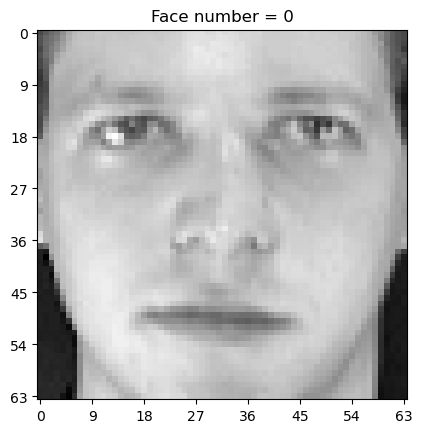

In [3]:
# select the index of the face to show
index = 0

# select the image and reshape it to show it
face = face_images[index,:]
plt.title(f'Face number = {index}')
plt.imshow(face, cmap='grey')
plt.xticks(np.linspace(0, 63, 8))
plt.yticks(np.linspace(0, 63, 8))

plt.show()

 - For convenience, please define the number of images of faces as **Nfaces** and the total number of pixeles as **Npix** using the *.shape* method

 - To be able to apply POD, we need a matrix. Please reshape the tensor face_images as a matrix of size ($n_{features}, n_{observations}$) (it will be our "X") and call it **face_X**

> Hint: Here, **Nfaces** is the number of observations (snapshots) and **Npix** is the number of features

In [4]:
Nfaces = face_images.shape[0]
Npix = face_images.shape[1] * face_images.shape[2]
print(f'Nfaces = {Nfaces}')
print(f'Npix = {Npix}')

face_X = face_images.reshape(Nfaces, Npix).T # <!> Not the same as: face_images.reshape(Npix, Nfaces) <!>
print(face_X.shape)

Nfaces = 400
Npix = 4096
(4096, 400)


##  Implement POD
Now, we write a function to **implement the POD algorithm**. Conventionally, the mean is removed from the dataset before applying POD. If this is not done, the mean will be the first PC.

 - Hint to define POD:
     1. center the matrix X
     2. compute the covariance matrix K = X0.T @ X0
     3. compute the eigendecomposition using np.linalg.eig
     4. sort the eigenvalues using np.sort and np.argsort
     5. compute the POD modes Z = X0 @ Psi
     6. normalize the POD modes phi[i] = z[i]/np.linalg.norm(z[i])
   
> Q: Why don't we scale the matrix X as before? Because all our features (pixels) represent the same thing, and they are already scaled between 0 and 1!
> 
> Q: Why do we compute K instead of C? Think about the dimensions of K and C ...
> 
> Q: Why can we compute the POD modes like that? Starting from what we know, we can see it like that:
> 
> If $Z = X_0\Psi$, $X_0 = Z\Psi^T$, then $K = X^TX = \Psi Z^TZ \Psi^T = \Psi L \Psi^T$ &rarr; $L = Z^TZ = (L^*)^2$ (1)
>
> But since $X_0 = \Phi L^* \Psi^T$, $Z = X_0 \Psi = \Phi L^*$ (2)
>
> Finally, if you isolate $\Phi$ using (1) and (2), you find that its columns are the normalised POD modes ($\Phi = \frac{Z}{||Z||}$)

In [5]:
# define the POD function

def POD(X):
    X_mean = X.mean(axis=1).reshape(-1, 1) # Mean of each row
    
    X0 = X - X_mean

    K = X0.T @ X0
    # print(K.shape)

    l, Psi = np.linalg.eig(K)
    idx_sorted = np.argsort(l)[::-1]
    # Sort l, Psi
    l = l[idx_sorted]
    Psi = Psi[:, idx_sorted]

    Z = X0 @ Psi # Compute the POD modes
    # Compute Phi
    Phi = Z/np.linalg.norm(Z, axis=0) # norm along columns !
    
    return Psi, Phi, l

# Uncomment when you have defined the function POD
Psi, Phi, l = POD(face_X)

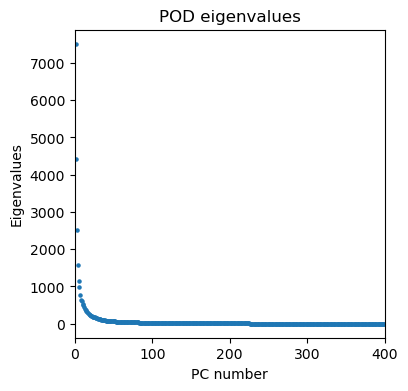

In [ ]:
# Uncomment when you have perfomed POD

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(np.linspace(1, Nfaces, Nfaces), l, s=5)
ax.set_title('POD eigenvalues')
plt.xlim([0, Nfaces])
plt.xlabel('PC number')
plt.ylabel('Eigenvalues')
plt.show()

# Observe and discuss the slope of the curve

##  Compute POD using the SVD 
Now, we can perform POD using directly the SVD and compute the explained variance as a function of the modes.

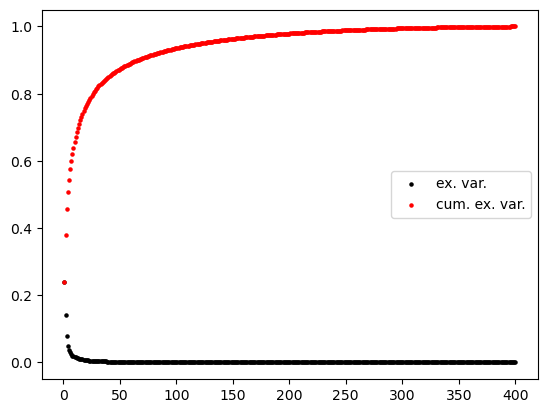

In [ ]:
# Use the np.linalg.svd function

# Centring
face_X_mean = face_X.mean(axis=1).reshape(-1, 1) # Mean of each row
face_X0 = face_X - face_X_mean

# SVD
Phi, sigma, Psi_t = np.linalg.svd(face_X0, full_matrices=False) # Always check the documentation for the functions you're using!
Psi = Psi_t.T
l = sigma**2

ex_var = l/np.sum(l) # Ratio of total explained variance

plt.figure()
plt.scatter(np.arange(Nfaces) + 1, ex_var, s=5, color='k', label='ex. var.')
plt.scatter(np.arange(Nfaces) + 1, np.cumsum(ex_var), s=5, color='r', label='cum. ex. var.')
plt.legend()
plt.show()

# Observe and discuss the slope of the curve

 ##### Show the first eigenfaces.
 
- Plot the first n=5 eigenfaces.

> Does it look likes ghosts? It should!

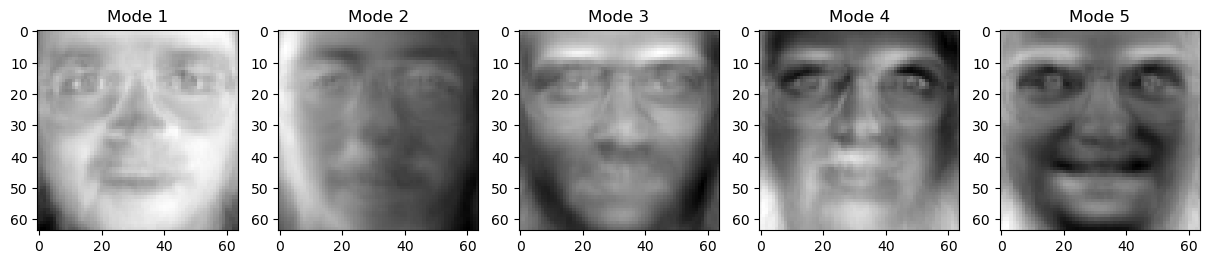

In [8]:
# uncomment this lines to show the eigenfaces:
# We can plot the first 5 modes 

n = 5
fig, axs = plt.subplots(1, n, figsize=(3*n, 3))
for i, ax in enumerate(axs):
    im = Phi.T.reshape(face_images.shape)[i, :]
    ax.imshow(im, cmap='grey')
    ax.set_title('Mode ' + str(i+1))

##### Test POD as a reduced-order model (ROM)
We can also check if we can use POD to achieve dimensionality reduction. This means that we can reconstructed the faces using few modes.

- To do:
    1. reconstruct the face number 10 using the first 10 modes, and compare it to the original
    2. reconstruct the same face with 1,5, 10, 100, 200 and 400 modes. Compare the solution
    
    
- hint: X_reconstructed = mean + Phi_q Aq.T 
- hint: Aq.T = Sigma_q @ Psi_q.T

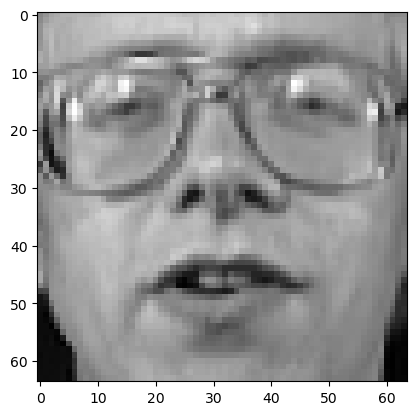

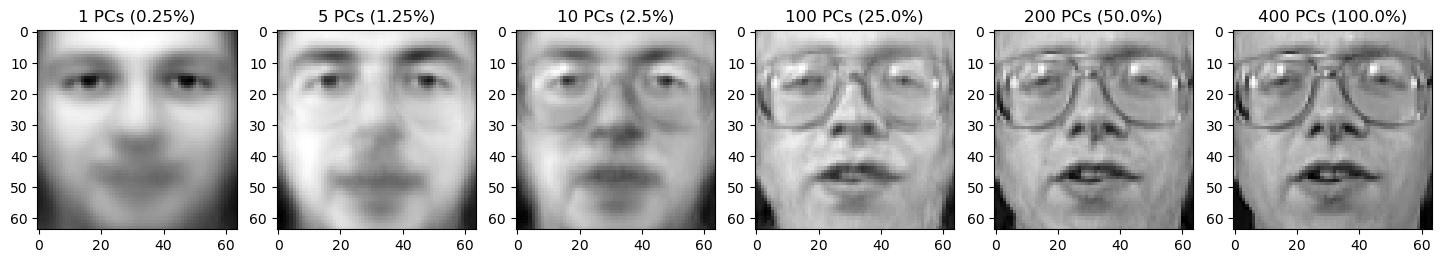

In [9]:
# Reconstruct the face number 10
index = 10
face_orig = face_X[:, index] # original face

plt.figure()
plt.imshow(face_orig.reshape(face_images.shape[1:]), cmap='grey')
plt.show()

# Low-dimensional projection
At = np.diag(sigma) @ Psi_t
A = At.T

# Modes
qs = [1, 5, 10, 100, 200, 400]

# Figure
fig, axs = plt.subplots(1, len(qs), figsize=(3*len(qs), 3))

for i, q in enumerate(qs):
    qperc = q/Nfaces * 100 # Percentage of faces used
    face_rec = face_X_mean.flatten() + Phi[:, :q] @ A[index, :q].T

    axs[i].imshow(face_rec.reshape(face_images.shape[1:]), cmap='grey')
    axs[i].set_title( str(q) + ' PCs (' + str(qperc) + '%)')
    
plt.show()

#### Canonical basis vs PCs
Explain what is the difference between using the canonical basis and the mdoes to express the images, and why we can reduce the dimensionality with POD and not with the canonical basis. 

##### - Canonical basis
How does this work? In the canonical basis, the image is the sum of some weights multiplied by the canonical basis:
\begin{equation}
    \mathbf{x} = \sum_{i=1}^{m} w_i \mathbf{b}_i
\end{equation}

- To do: 
 1. Define the canonical basis $\mathbf{B}=[\mathbf{b}_1, \cdots \mathbf{b}_m]$
 2. Obtain the weights $w_i$ of the first 4 directions (n_basis=4)  $\mathbf{W}=[\mathbf{w}_1, \cdots \mathbf{w}_m]$
 3. Show how the first 4 basis vectors look like ($b_i$)

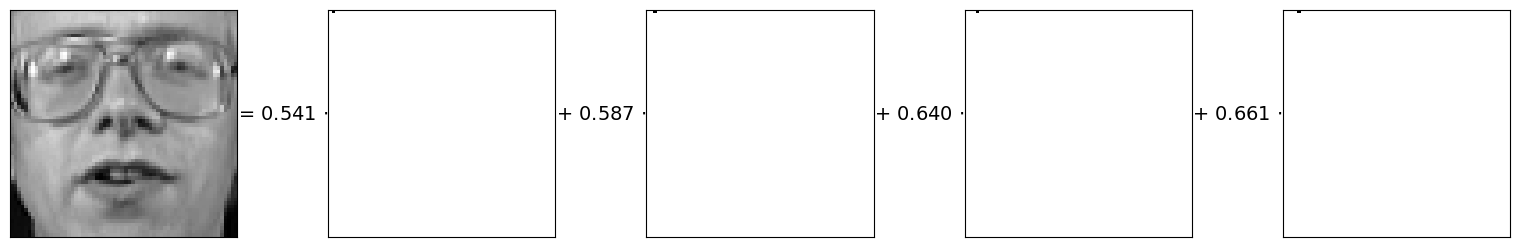

In [18]:
index = 10
face_orig = face_X[:, index] # original face

# What are the weights?

# Canonical basis
B = np.eye(Npix)
# Choose the first 4 directions
n_basis = 4

# X = B·W
W = face_X[:n_basis, index] # weigths

# Plotting function
fig, axs = plt.subplots(1, (n_basis+1), figsize=((n_basis+1)*3, 3))
fig.set_facecolor('white')
axs[0].imshow(face_orig.reshape(face_images.shape[1:]), cmap='grey')
axs[0].set_xticks([])
axs[0].set_yticks([])

for i in range(1, n_basis+1):
    axs[i].imshow(B[:, i].reshape(face_images.shape[1:]), cmap='Greys')
    axs[i].yaxis.set_label_coords(-0.2,0.5)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    if i == 1:
        axs[i].set_ylabel('= {:.3f} $\cdot$'.format(W[i-1]), rotation=0, fontsize=14)
    else:
        axs[i].set_ylabel('+ {:.3f} $\cdot$'.format(W[i-1]), rotation=0, fontsize=14)

fig.subplots_adjust(left=0, right=1, bottom=0., top=1, wspace=0.4)
plt.show()

##    4. Plot original face VS reconstruction with 100 modes

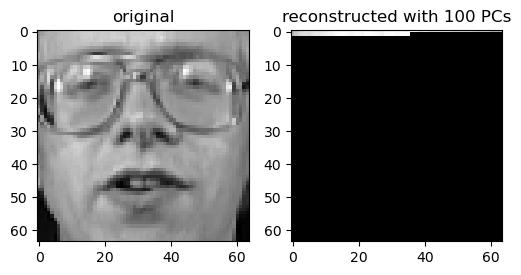

In [15]:
q= 100
index  = 10

face_orig = face_X[:, index]
face_rec = face_X[:q, index] @ B[:, :q].T

# Plot them side by side (do it yourself this time !)
fig, axs = plt.subplots(1,2, figsize=(6, 3))
axs[0].imshow(face_orig.reshape(face_images.shape[1:]), cmap='grey')
axs[0].set_title('original')
axs[1].imshow(face_rec.reshape(face_images.shape[1:]), cmap='grey')
axs[1].set_title('reconstructed with ' + str(q) + ' PCs')
plt.show()

# We could do better ...

#### - POD basis
How does this work? In the POD basis, the image is the sum of some weights multiplied by the POD basis:
\begin{equation}
    \mathbf{x} = \mu(x) + \sum_{i=1}^{m} a_i \boldsymbol{\phi}_i
\end{equation}

- To do: 
 1. POD basis already defined: $\boldsymbol{\Phi}=[\boldsymbol{\phi}_1, \cdots \boldsymbol{\phi}_m]$
 2. POD coefficients already known too: $\mathbf{A}=[\mathbf{a}_1, \cdots \mathbf{a}_m]$ 
 3. Show how the first 4 basis vectors look like.

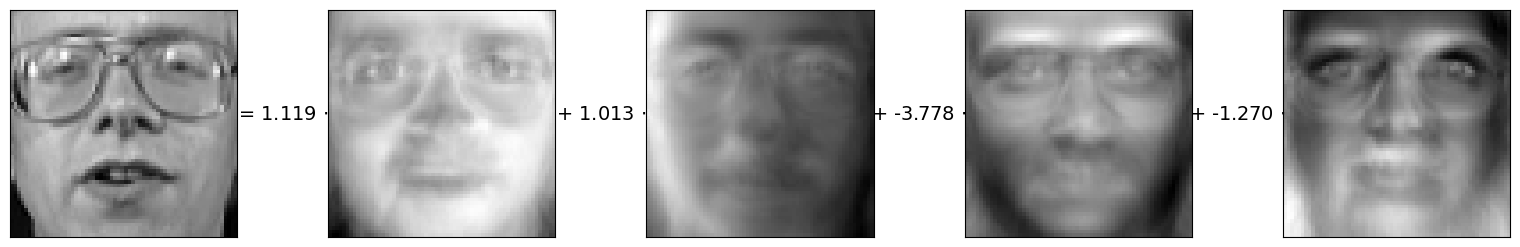

In [19]:
index = 10
face = face_X[:, index]

n_basis = 4 # 4 first directions (over 4096 ...)

# What are the weights?

a = At[:n_basis, index]

# plot of the first 4 basis vectors a_i (copypaste from above and modify what needs to be modified)
fig, axs = plt.subplots(1, (n_basis+1), figsize=((n_basis+1)*3, 3))
fig.set_facecolor('white')
axs[0].imshow(face_orig.reshape(face_images.shape[1:]), cmap='grey')
axs[0].set_xticks([])
axs[0].set_yticks([])

for i in range(1, n_basis+1):
    axs[i].imshow(Phi[:, i-1].reshape(face_images.shape[1:]), cmap='grey')
    axs[i].yaxis.set_label_coords(-0.2,0.5)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    if i == 1:
        axs[i].set_ylabel('= {:.3f} $\cdot$'.format(a[i-1]), rotation=0, fontsize=14)
    else:
        axs[i].set_ylabel('+ {:.3f} $\cdot$'.format(a[i-1]), rotation=0, fontsize=14)

fig.subplots_adjust(left=0, right=1, bottom=0., top=1, wspace=0.4)
plt.show()